<a href="https://colab.research.google.com/github/omkar123katare/Regression_news_popularity_prediction/blob/main/News_Popularity_Prediction_in_Social_Media_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Predicting the news popularity in multiple social media platforms. </u></b>

## <b> Problem Description </b>

### This is a large data set of news items and their respective social feedback on multiple platforms: Facebook, Google+ and LinkedIn.The collected data relates to a period of 8 months, between November 2015 and July 2016, accounting for about 100,000 news items on four different topics: Economy, Microsoft, Obama and Palestine.


## <b> Data Description </b>

### <b>Attribute Information: </b>

* ### IDLink (numeric): Unique identifier of news items
* ### Title (string): Title of the news item according to the official media sources
* ### Headline (string): Headline of the news item according to the official media sources
* ### Source (string): Original news outlet that published the news item
* ### Topic (string): Query topic used to obtain the items in the official media sources
* ### PublishDate (timestamp): Date and time of the news items' publication
* ### SentimentTitle (numeric): Sentiment score of the text in the news items' title
* ### SentimentHeadline (numeric): Sentiment score of the text in the news items' headline
* ### Facebook (numeric): Final value of the news items' popularity according to the social media source Facebook
* ### GooglePlus (numeric): Final value of the news items' popularity according to the social media source Google+
* ### LinkedIn (numeric): Final value of the news items' popularity according to the social media source LinkedIn


### VARIABLES OF SOCIAL FEEDBACK DATA

* ### IDLink (numeric): Unique identifier of news items
* ### TS1 (numeric): Level of popularity in time slice 1 (0-20 minutes upon publication)
* ### TS2 (numeric): Level of popularity in time slice 2 (20-40 minutes upon publication)
* ### TS... (numeric): Level of popularity in time slice ...
* ### TS144 (numeric): Final level of popularity after 2 days upon publication

# **Introduction**


---


1. With the advancement in technology, news organizations have begun to rely more on online social platforms and media analytics as a way to attract readers. So, for news publishing sources, it’s become very important to know which kind of news articles will appeal more to the readers. In this project, firstly we have a news dataset which contains around 100000 news items published on three social media platforms: Facebook, Google Plus and LinkedIn, between November 2015 to July 2016 on four topics: Obama, Economy, Palestine, Microsoft. And we also have 12 social feedback dataset which contains the popularity level of news items in incremental time slices of 20 min after publication.

2. As the first step of our experiment, I performed **Data Cleaning** by **removing trash and duplicate data**, applied **null value treatment** and **removed outliers** in the data set using the **90th percentile quantile method**. I further applied the **Standardization technique** for feature scaling.

3. In **Exploratory Data Analysis**,I categorized SentimentTitle, SentimentHeadline and sources to extract some meaningful insights from the data. Then I compared popularity between the social media platforms using multiple plots.

4. I applied **text-preprocessing techniques** to transform the headline and title of the news items.

5. For feature selection, I used **ExtraTreeRegressor** and **Correlation matrix** to obtain results on features.

6. For model prediction, I used supervised machine learning algorithms like **Decision Trees, Catboost, LightGBM, Gradient Boosting, KNN** and then applied **hyperparameter tuning techniques** to obtain better accuracy and to avoid overfitting.

So, without any further delay let’s move ahead!

# **Installing Dependencies**

---


1. We are using textblob library to work with textual data.
2. Further in the project, we would require to tune the hyperparameters of Machine Learning models for better performance.
3. Due to the huge amount of training data sets, the traditional tuning models are not efficient (in terms of time taken) to work with, like GridSerachCV and RandomizedSearchCV.
So, we decided to move with the latest tuning model called HalvingRandomizedSearchCV, which is available in the latest version of scikit-learn i.e. 0.24.2.
4. Catboost is a Machine Learning model.



In [3]:
!pip install -U textblob
!pip install catboost

!pip uninstall scikit-learn -y
!pip install -U scikit-learn
!pip install shap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 636 kB 5.1 MB/s 
  Attempting uninstall: textblob
    Found existing installation: textblob 0.15.3
    Uninstalling textblob-0.15.3:
      Successfully uninstalled textblob-0.15.3
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 76.6 MB 1.3 MB/s 
Found existing installation: scikit-learn 1.0.2
Uninstalling scikit-learn-1.0.2:
  Successfully uninstalled scikit-learn-1.0.2
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 24.8 MB 1.9 MB/s 
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 569 kB 890 kB/s 


# **Importing Libraries**

In [4]:
#@title

import numpy as np
import pandas as pd

# Visualisation Libraries
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

# Sklearn Libraries
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import VarianceThreshold
from sklearn.model_selection import train_test_split
from sklearn.ensemble import ExtraTreesRegressor


# Model Libraries
import catboost as cb
from sklearn.tree import DecisionTreeRegressor 
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsRegressor
from sklearn.experimental import enable_halving_search_cv
from sklearn.model_selection import HalvingRandomSearchCV
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from lightgbm import LGBMRegressor
from sklearn.ensemble import GradientBoostingRegressor


# Miscellaneous Libraries
from datetime import datetime
import time
import calendar
import random

import nltk
import string
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from textblob import Word
import shap
import IPython

import warnings
warnings.filterwarnings('ignore')


nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# **Reading Datasets**


---
Let's read the datasets we have to work on! We have 4 Social Media feedback datasets of each dependent variable, i.e. in total we have 12 time-series datasets and 1 news data set.


In [6]:
sources= ['Facebook', 'GooglePlus', 'LinkedIn']
topics = ['Economy','Microsoft', 'Obama', 'Palestine']

folder_path = '/content/drive/MyDrive/Data Science Projects-AlmaBetter/Capstone_2_News_popularity_prediction/Data & Resources-20220625T153929Z-001/Data _ Resources/'
master_df = pd.read_csv(folder_path+'News_Final.csv')
df = {}
for source in sources:
  for topic in topics:
    file_name = f'{source}_{topic}.csv'
    file_path = f'{folder_path}{file_name}'
    df[f'{source}_{topic}'] = pd.read_csv(file_path)

# **Data Wrangling**

- Data wrangling is the process of cleaning and unifying messy and complex data sets for easy access and analysis.

- This process typically includes manually converting and mapping data from one raw form into another format to allow for more convenient consumption and organization of the data.

*Let's dive into the datasets!*

### **Datasets:**
- Social Media Feedback Datasets (12 Datasets)
- News Dataset

## **1. Social Media Feedback Datasets (12 Datasets)**
---

- These datasets have popularities of news upon every 20 minutes of publication. 

- It consists of 145 columns and N rows, where N is the number of news appeared on that particular social media platform and of that particular topic.

### **Columns:**
> **IDLink:** Unique identifier of news item.

> **TS1:** Popularity level in time slice 1 (0-20 minutes upon publication)

> **TS2:** Popularity level in time slice 2 (20-40 minutes upon publication)

>  ....

> **TS144:** Final level of popularity after 2 days upon publication.

*Let's have a look into one of those datasets,*

In [7]:
df['Facebook_Microsoft'].head()

,IDLink,TS1,TS2,TS3,TS4,TS5,TS6,TS7,TS8,TS9,...,TS135,TS136,TS137,TS138,TS139,TS140,TS141,TS142,TS143,TS144
0,101,-1,-1,-1,-1,-1,30,30,30,30,...,131,131,131,131,131,131,131,131,133,133
1,102,-1,-1,-1,-1,-1,-1,-1,-1,-1,...,57,57,57,57,57,57,57,58,58,58
2,103,-1,-1,-1,-1,-1,-1,-1,-1,-1,...,259,259,260,260,260,260,261,262,262,263
3,104,-1,-1,-1,-1,-1,-1,-1,-1,-1,...,13,13,13,13,13,13,13,13,13,13
4,105,-1,-1,-1,-1,-1,-1,-1,-1,-1,...,314,314,315,315,316,316,316,316,316,316


In [8]:
df['Facebook_Microsoft'].tail()

,IDLink,TS1,TS2,TS3,TS4,TS5,TS6,TS7,TS8,TS9,...,TS135,TS136,TS137,TS138,TS139,TS140,TS141,TS142,TS143,TS144
18526,58442,-1,-1,-1,-1,-1,-1,-1,-1,-1,...,22,22,22,22,22,22,22,22,22,22
18527,58443,-1,-1,-1,-1,-1,-1,-1,-1,-1,...,1,1,1,1,1,1,1,1,1,1
18528,58448,-1,-1,-1,-1,-1,-1,-1,-1,-1,...,37,37,37,37,37,37,37,37,37,37
18529,58449,-1,-1,-1,-1,-1,-1,-1,-1,-1,...,0,0,0,0,0,0,0,0,0,0
18530,58450,-1,-1,-1,-1,-1,-1,-1,-1,-1,...,8,8,8,8,8,8,8,8,8,8


In [9]:
# Checking Null values 
for d in df:
    print(f'Null Values of {d}:',sum(df[d].isna().sum()))

Null Values of Facebook_Economy: 0
Null Values of Facebook_Microsoft: 0
Null Values of Facebook_Obama: 0
Null Values of Facebook_Palestine: 0
Null Values of GooglePlus_Economy: 0
Null Values of GooglePlus_Microsoft: 0
Null Values of GooglePlus_Obama: 0
Null Values of GooglePlus_Palestine: 0
Null Values of LinkedIn_Economy: 0
Null Values of LinkedIn_Microsoft: 0
Null Values of LinkedIn_Obama: 0
Null Values of LinkedIn_Palestine: 0


### **Observations:**
---
- All other datasets are similar to the dataset shown above.
- They have no null values.
- TS144 is the dependent variable of the news dataset.
- -1 level of popularity means the news item hasn't come to the platform yet.
- 0 level of popularity means the news item has landed the platform but is not at all popular as of now.
- 1 level of popularity means the news item's popularity has increased to 1 and so on.

## **2. News Dataset**
---
This dataset contains all the information related to the news item. It consist of 93239 rows and 11 columns.


In [10]:
master_df.shape

(93239, 11)

### **Columns:**

> **IDLink:** Unique identifier of news item.

> **Title:** Title of the news item.

> **Headline:** Headline of the news item.

> **Source:** Original news outlet that published the news item.

> **Topic:** Topic of the news item.

> **PublishDate:** Date on which the news item got published.

> **SentimentTitle:** It is the sentiment title score.

> **SentimentHeadline:** It is the sentiment headline score.

> **Dependent Variables:**

- **Facebook:** Popularity after 2 days on Facebook platform upon publication.

- **GooglePlus:** Popularity after 2 days on GooglePlus platform upon publication.

- **LinkedIn:** Popularity after 2 days on LinkedIn platform upon publication.

In [11]:
news_df = master_df.copy()
master_df.head()

,IDLink,Title,Headline,Source,Topic,PublishDate,SentimentTitle,SentimentHeadline,Facebook,GooglePlus,LinkedIn
0,99248.0,Obama Lays Wreath at Arlington National Cemetery,Obama Lays Wreath at Arlington National Cemete...,USA TODAY,obama,2002-04-02 00:00:00,0.000000,-0.053300,-1,-1,-1
1,10423.0,A Look at the Health of the Chinese Economy,"Tim Haywood, investment director business-unit...",Bloomberg,economy,2008-09-20 00:00:00,0.208333,-0.156386,-1,-1,-1
2,18828.0,Nouriel Roubini: Global Economy Not Back to 2008,"Nouriel Roubini, NYU professor and chairman at...",Bloomberg,economy,2012-01-28 00:00:00,-0.425210,0.139754,-1,-1,-1
3,27788.0,Finland GDP Expands In Q4,Finland's economy expanded marginally in the t...,RTT News,economy,2015-03-01 00:06:00,0.000000,0.026064,-1,-1,-1
4,27789.0,"Tourism, govt spending buoys Thai economy in J...",Tourism and public spending continued to boost...,The Nation - Thailand&#39;s English news,economy,2015-03-01 00:11:00,0.000000,0.141084,-1,-1,-1


In [12]:
master_df.tail()

,IDLink,Title,Headline,Source,Topic,PublishDate,SentimentTitle,SentimentHeadline,Facebook,GooglePlus,LinkedIn
93234,61851.0,Stocks rise as investors key in on US economy ...,The June employment report is viewed as a cruc...,MarketWatch,economy,2016-07-07 15:31:05,0.104284,0.044943,-1,3,5
93235,61865.0,Russian PM proposes to use conservative and to...,"In addition, establish stimulating economic po...",TASS,economy,2016-07-07 15:31:10,0.072194,0.000000,-1,0,1
93236,104793.0,Palestinian Government Uses Foreign Aid To Pay...,The Palestinian government spends nearly $140 ...,Daily Caller,palestine,2016-07-07 15:38:26,0.291667,-0.139754,5,1,0
93237,104794.0,Palestine Youth Orchestra prepares for first U...,Palestine Youth Orchestra prepares for first U...,Ahram Online,palestine,2016-07-07 15:59:22,0.121534,0.092313,0,0,0
93238,61870.0,Sausalito businesswoman wins $10000 in Microso...,"Goldstein, the proprietor of the TG Travel Gro...",East Bay Times,microsoft,2016-07-07 16:16:11,0.000000,0.054554,-1,1,0


In [13]:
master_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93239 entries, 0 to 93238
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   IDLink             93239 non-null  float64
 1   Title              93239 non-null  object 
 2   Headline           93224 non-null  object 
 3   Source             92960 non-null  object 
 4   Topic              93239 non-null  object 
 5   PublishDate        93239 non-null  object 
 6   SentimentTitle     93239 non-null  float64
 7   SentimentHeadline  93239 non-null  float64
 8   Facebook           93239 non-null  int64  
 9   GooglePlus         93239 non-null  int64  
 10  LinkedIn           93239 non-null  int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 7.8+ MB


In [14]:
master_df.describe()

,IDLink,SentimentTitle,SentimentHeadline,Facebook,GooglePlus,LinkedIn
count,93239.000000,93239.000000,93239.000000,93239.000000,93239.000000,93239.000000
mean,51560.653257,-0.005411,-0.027493,113.141336,3.888362,16.547957
std,30391.078704,0.136431,0.141964,620.173233,18.492648,154.459048
min,1.000000,-0.950694,-0.755433,-1.000000,-1.000000,-1.000000
25%,24301.500000,-0.079057,-0.114574,0.000000,0.000000,0.000000
50%,52275.000000,0.000000,-0.026064,5.000000,0.000000,0.000000
75%,76585.500000,0.064255,0.059709,33.000000,2.000000,4.000000
max,104802.000000,0.962354,0.964646,49211.000000,1267.000000,20341.000000


### **Observations:**
---
- Title and Headline columns contain textual data. We would require to use TfidfVectorizer or CountVectorizer to deal with them.
- Topic is the categorical column, with 4 categories in it.
- Source and Headline column contains some null values.
- -1 level of popularity shows that the particular news item didn't land on the platform in two days upon publication.
- We also have data whose popularity in all the social media platforms (Dependent Features) is -1. This implies that those are trash data.

## **Data Cleaning and Refactoring**
---
Let's reformat and clean the data for smooth processing!

**Dealing with unique values in dataset which are counted twice because of upper and lower casing**

In [15]:
for elem in list(master_df.columns):
  if elem not in list(master_df.describe().columns):
    print(f"{elem} is a text data. Having {master_df[elem].nunique()} unique values in it.")

Title is a text data. Having 81259 unique values in it.
Headline is a text data. Having 86694 unique values in it.
Source is a text data. Having 5756 unique values in it.
Topic is a text data. Having 4 unique values in it.
PublishDate is a text data. Having 82644 unique values in it.


In [16]:
for elem in list(master_df.columns):
  if elem not in list(master_df.describe().columns):
    master_df[elem]=master_df[elem].apply(lambda x:str(x).lower())

In [17]:
for elem in list(master_df.columns):
  if elem not in list(master_df.describe().columns):
    print(f"{elem} is a text data. Having {master_df[elem].nunique()} unique values in it.")

Title is a text data. Having 80145 unique values in it.
Headline is a text data. Having 86639 unique values in it.
Source is a text data. Having 5742 unique values in it.
Topic is a text data. Having 4 unique values in it.
PublishDate is a text data. Having 82644 unique values in it.


By lowercasing the textual columns have reduced the unique rows of columns 'title','headline','source'. Which otherwise would have been considered as different.

**Dealing with negative popularities**

- We have negative popularities in Social Media Feedback datasets and news dataset.
- It was quite difficult to deal with negative popularities while data scaling, predicting, EDA, etc. So, we decided to increase all the levels of popularities by 1.
- This, in turn, makes 0 level of popularity as news item not landed on the platform yet upon publication, and so on.
- This step won't affect our prediction or analysis. It will only make it easier to deal with the data.

In [18]:
# Increasing Popularity level by 1 to deal with the level -1
for col in sources:
    master_df[col] = master_df[col].apply(lambda x:x+1)

for idf in df:
    for col in df[idf]:
        if col == 'IDLink':
            continue
        df[idf][col] += 1

In [19]:
master_df.head()

,IDLink,Title,Headline,Source,Topic,PublishDate,SentimentTitle,SentimentHeadline,Facebook,GooglePlus,LinkedIn
0,99248.0,obama lays wreath at arlington national cemetery,obama lays wreath at arlington national cemete...,usa today,obama,2002-04-02 00:00:00,0.000000,-0.053300,0,0,0
1,10423.0,a look at the health of the chinese economy,"tim haywood, investment director business-unit...",bloomberg,economy,2008-09-20 00:00:00,0.208333,-0.156386,0,0,0
2,18828.0,nouriel roubini: global economy not back to 2008,"nouriel roubini, nyu professor and chairman at...",bloomberg,economy,2012-01-28 00:00:00,-0.425210,0.139754,0,0,0
3,27788.0,finland gdp expands in q4,finland's economy expanded marginally in the t...,rtt news,economy,2015-03-01 00:06:00,0.000000,0.026064,0,0,0
4,27789.0,"tourism, govt spending buoys thai economy in j...",tourism and public spending continued to boost...,the nation - thailand&#39;s english news,economy,2015-03-01 00:11:00,0.000000,0.141084,0,0,0


In [20]:
df['Facebook_Economy'].head()

,IDLink,TS1,TS2,TS3,TS4,TS5,TS6,TS7,TS8,TS9,...,TS135,TS136,TS137,TS138,TS139,TS140,TS141,TS142,TS143,TS144
0,1,0,0,0,0,0,0,0,0,8,...,14,14,14,14,14,14,14,14,14,14
1,2,0,0,0,0,0,0,0,0,4,...,43,43,43,43,43,43,43,43,43,43
2,3,0,0,0,0,0,0,0,0,0,...,99,99,99,99,99,99,99,99,99,99
3,4,0,0,0,0,0,0,0,0,0,...,8,8,8,8,8,8,8,8,8,8
4,5,0,0,0,0,0,0,0,0,0,...,35,35,35,35,35,35,35,35,35,35


In [21]:
master_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93239 entries, 0 to 93238
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   IDLink             93239 non-null  float64
 1   Title              93239 non-null  object 
 2   Headline           93239 non-null  object 
 3   Source             93239 non-null  object 
 4   Topic              93239 non-null  object 
 5   PublishDate        93239 non-null  object 
 6   SentimentTitle     93239 non-null  float64
 7   SentimentHeadline  93239 non-null  float64
 8   Facebook           93239 non-null  int64  
 9   GooglePlus         93239 non-null  int64  
 10  LinkedIn           93239 non-null  int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 7.8+ MB


**Dealing with null values**

In [22]:
# Check Null values

print(master_df.isna().sum())
print("*****")
print(f'Count of news articles from various sources is as follows :{dict(master_df.Source.value_counts())}')

IDLink               0
Title                0
Headline             0
Source               0
Topic                0
PublishDate          0
SentimentTitle       0
SentimentHeadline    0
Facebook             0
GooglePlus           0
LinkedIn             0
dtype: int64
*****
Count of news articles from various sources is as follows :{'bloomberg': 1732, 'reuters': 1321, 'abc news': 1098, 'new york times': 992, 'the guardian': 933, 'business insider': 884, 'economic times': 787, 'forbes': 781, 'washington post': 774, 'cnn': 742, 'wall street journal': 730, 'winbeta': 707, 'cnbc': 682, 'huffington post': 676, 'breitbart news': 605, 'reuters via yahoo! finance': 551, 'the hill': 548, 'financial times': 544, 'usa today': 536, 'zdnet': 526, 'mspoweruser.com': 516, 'daily mail': 510, 'fox news': 505, 'afp via yahoo! news': 501, 'npr': 481, 'bbc news': 481, 'washington times': 448, 'the hill (blog)': 442, 'associated press via yahoo! news': 437, 'reuters via yahoo! news': 409, 'daily caller': 401,

In step of converting all the text columns into lower case, we have dealt with null columns. If Null values were there, 
1. we would have dealt with them by Removing the rows if the number of rows with null values is very small compared to whole number of all the rows. 
2. We could have filled empty cells by doing Mean/Median?Mode imputation.
3. Regression imputation.


**Working on PublishDate Column**

- We have separated the date and the time into separate columns for the ease of working and analysis.

In [23]:
print(pd.to_datetime("1997-10-18").weekday())
print(pd.to_datetime("1997-10-18").day_name())

5
Saturday


In [24]:
master_df["PublishDate"]=pd.to_datetime(master_df["PublishDate"])
master_df["PublishTime"]=master_df["PublishDate"].dt.time
master_df["PublishDate"]=master_df["PublishDate"].dt.date

# Extracting Day of the Week
master_df['Weekday'] = master_df.PublishDate.apply(lambda x: calendar.day_name[x.weekday()])


master_df.head()

,IDLink,Title,Headline,Source,Topic,PublishDate,SentimentTitle,SentimentHeadline,Facebook,GooglePlus,LinkedIn,PublishTime,Weekday
0,99248.0,obama lays wreath at arlington national cemetery,obama lays wreath at arlington national cemete...,usa today,obama,2002-04-02,0.000000,-0.053300,0,0,0,00:00:00,Tuesday
1,10423.0,a look at the health of the chinese economy,"tim haywood, investment director business-unit...",bloomberg,economy,2008-09-20,0.208333,-0.156386,0,0,0,00:00:00,Saturday
2,18828.0,nouriel roubini: global economy not back to 2008,"nouriel roubini, nyu professor and chairman at...",bloomberg,economy,2012-01-28,-0.425210,0.139754,0,0,0,00:00:00,Saturday
3,27788.0,finland gdp expands in q4,finland's economy expanded marginally in the t...,rtt news,economy,2015-03-01,0.000000,0.026064,0,0,0,00:06:00,Sunday
4,27789.0,"tourism, govt spending buoys thai economy in j...",tourism and public spending continued to boost...,the nation - thailand&#39;s english news,economy,2015-03-01,0.000000,0.141084,0,0,0,00:11:00,Sunday


### **Trash Data**
---

**Date Range restriction**

- It is clearly mentioned in the problem statement that news items in the dataset belongs to a range of dates but we found out that some news items does not belong in the specified dates. So, we are dropping all those rows.

In [25]:
# Handling date range
print('Start Date:',min(master_df['PublishDate']))
print('End Date:',max(master_df['PublishDate']))

# Taking Value between range 2015 Nov to 2016 July
master_df = master_df[(master_df['PublishDate']>=pd.to_datetime('2015-11-01').date()) & (master_df['PublishDate']<=pd.to_datetime('2016-08-01').date())]

print('Start Date:',min(master_df['PublishDate']))
print('End Date:',max(master_df['PublishDate']))

master_df.head()

Start Date: 2002-04-02
End Date: 2016-07-07
Start Date: 2015-11-01
End Date: 2016-07-07


,IDLink,Title,Headline,Source,Topic,PublishDate,SentimentTitle,SentimentHeadline,Facebook,GooglePlus,LinkedIn,PublishTime,Weekday
6,80690.0,"monday, 29 feb 2016","ramallah, february 25, 2016 (wafa) - palestine...",nan,palestine,2016-02-28,0.000000,-0.005906,1,1,1,14:03:00,Sunday
31,28854.0,buffett: politicians 'dead wrong' on economy,warren buffett has a message for presidential ...,the wall street journal,economy,2016-02-28,0.051031,-0.037921,0,0,0,19:17:00,Sunday
56,81052.0,"monday, 29 feb 2016","ramallah, february 29, 2016 (wafa) - the gover...",nan,palestine,2016-03-01,0.000000,0.048546,1,1,1,09:29:00,Tuesday
111,80994.0,"tuesday, 1 mar 2016","ramallah, february 29, 2016 (wafa) - the gover...",nan,palestine,2016-03-01,-0.243068,0.048546,1,1,1,00:15:00,Tuesday
416,946.0,microsoft takes six billion dollars from android,"a long time ago, microsoft msft +0.00% purchas...",forbes,microsoft,2015-11-01,0.000000,0.115928,0,0,0,00:00:00,Sunday


In [26]:
master_df.shape

(92827, 13)

**Not Landed On Any Social Media Platform**

- We also have data whose popularity level on every social media platform is 0, i.e. News item never landed on any social media platform.

- To us that data is a trash data because it won't be able to help us identifing one's popularity, instead, it could lead to confusion during model prediction.

- That's why we decided to drop all those rows from our dataset.

In [27]:
# dropping rows whose popularity is -1 in all the social media platforms
index_to_drop = master_df[(master_df['Facebook']==0) & (master_df['GooglePlus']==0) & (master_df['LinkedIn']==0)].index
print('Shape Before Dropping:',master_df.shape)


master_df.drop(index_to_drop,inplace=True)
print('Shape After Dropping:',master_df.shape)

Shape Before Dropping: (92827, 13)
Shape After Dropping: (87495, 13)


**Duplicate Rows**
- We have a few duplicate rows as well. Let's drop all those too!

In [28]:
# Dropping Duplicate Rows
print(f"Shape Before dropping the duplicate rows : {master_df.shape}")
print(master_df[master_df.duplicated()])
master_df.drop_duplicates(inplace=True)
print(f"Shape after dropping the duplicate rows : {master_df.shape}")

Shape Before dropping the duplicate rows : (87495, 13)
        IDLink                Title  \
44426  80690.0  monday, 29 feb 2016   
44944  80994.0  tuesday, 1 mar 2016   
45122  81052.0  monday, 29 feb 2016   

                                                Headline Source      Topic  \
44426  ramallah, february 25, 2016 (wafa) - palestine...    nan  palestine   
44944  ramallah, february 29, 2016 (wafa) - the gover...    nan  palestine   
45122  ramallah, february 29, 2016 (wafa) - the gover...    nan  palestine   

      PublishDate  SentimentTitle  SentimentHeadline  Facebook  GooglePlus  \
44426  2016-02-28        0.000000          -0.005906         1           1   
44944  2016-03-01       -0.243068           0.048546         1           1   
45122  2016-03-01        0.000000           0.048546         1           1   

       LinkedIn PublishTime  Weekday  
44426         1    14:03:00   Sunday  
44944         1    00:15:00  Tuesday  
45122         1    09:29:00  Tuesday  
Shape 

## **Outlier Treatment and Standardization**
---
- A *density plot* is a representation of the distribution of a numeric variable. It is important for us to understand the distribution so as to take necessary actions.
- Standardization removes the mean and scales each feature/variable to unit variance. 
- We are using **StandardScaler** for standardization.
- StandardScaler can be influenced by outliers since it involves the estimation of the empirical mean and standard deviation of each feature. So we will begin with looking for outliers first.

In [29]:
master_df.shape

(87492, 13)

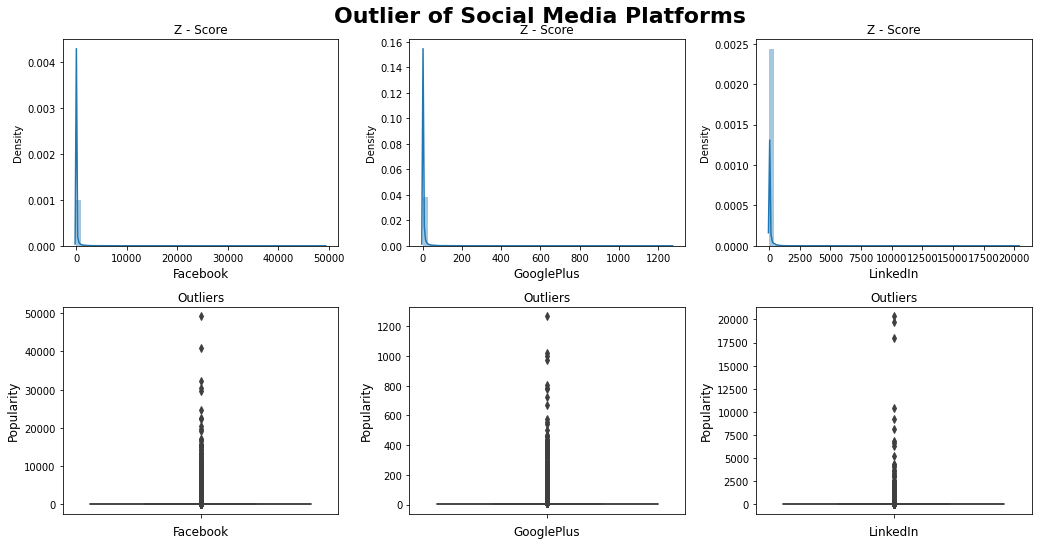

In [30]:
def show_outliers(df, three_d = False):
    fig, axes = plt.subplots(2,3,figsize=(15, 8))
    fig.tight_layout(pad=4.0)
    for source in range(len(sources)):
        sns.distplot(ax=axes[0][source],x=df[sources[source]])
        axes[0][source].set_xlabel(sources[source],fontdict={'fontsize': 12})
        axes[1][source].set_ylabel('Density',fontdict={'fontsize': 12})

        sns.boxplot(ax=axes[1][source],y=df[sources[source]] )    
        axes[1][source].set_xlabel(sources[source],fontdict={'fontsize': 12})
        axes[1][source].set_ylabel('Popularity',fontdict={'fontsize': 12})

        axes[0][source].set_title('Z - Score')
        axes[1][source].set_title('Outliers')

        plt.suptitle('Outlier of Social Media Platforms',fontsize = 22,fontweight = 'bold')

    plt.show()
    
    if three_d == True:
        fig = px.scatter_3d(df, x='Facebook', y='GooglePlus', z='LinkedIn', title='Dependent Variables')
        fig.show()


show_outliers(master_df, True)

- The Density Plot clearly shows the data is Positively Skewed.
- We can observe outliers with the help of Box and Whisker plot.
- From the 3-D plot, we can clearly see how dependent features are distributed.
- Since, our data consists of outliers, let's start with handling them.

### **Outlier Treatment**
---
We have used the ***Quantile Method*** to treat outliers along with the 90 percentile method.

In [31]:
master_df

,IDLink,Title,Headline,Source,Topic,PublishDate,SentimentTitle,SentimentHeadline,Facebook,GooglePlus,LinkedIn,PublishTime,Weekday
6,80690.0,"monday, 29 feb 2016","ramallah, february 25, 2016 (wafa) - palestine...",nan,palestine,2016-02-28,0.000000,-0.005906,1,1,1,14:03:00,Sunday
56,81052.0,"monday, 29 feb 2016","ramallah, february 29, 2016 (wafa) - the gover...",nan,palestine,2016-03-01,0.000000,0.048546,1,1,1,09:29:00,Tuesday
111,80994.0,"tuesday, 1 mar 2016","ramallah, february 29, 2016 (wafa) - the gover...",nan,palestine,2016-03-01,-0.243068,0.048546,1,1,1,00:15:00,Tuesday
726,311.0,microsoft offering £100 discount on original b...,just ahead of the market rollout of microsoft'...,international business times via yahoo uk & ir...,microsoft,2015-11-08,0.000000,-0.132812,1,1,1,05:25:00,Sunday
727,252.0,economy to improve though no change in last 6 ...,"&quot;in the coming six months, there seems to...",ians india private limited/yahoo india news vi...,economy,2015-11-08,-0.082022,0.205537,1,1,1,05:40:00,Sunday
...,...,...,...,...,...,...,...,...,...,...,...,...,...
93234,61851.0,stocks rise as investors key in on us economy ...,the june employment report is viewed as a cruc...,marketwatch,economy,2016-07-07,0.104284,0.044943,0,4,6,15:31:05,Thursday
93235,61865.0,russian pm proposes to use conservative and to...,"in addition, establish stimulating economic po...",tass,economy,2016-07-07,0.072194,0.000000,0,1,2,15:31:10,Thursday
93236,104793.0,palestinian government uses foreign aid to pay...,the palestinian government spends nearly $140 ...,daily caller,palestine,2016-07-07,0.291667,-0.139754,6,2,1,15:38:26,Thursday
93237,104794.0,palestine youth orchestra prepares for first u...,palestine youth orchestra prepares for first u...,ahram online,palestine,2016-07-07,0.121534,0.092313,1,1,1,15:59:22,Thursday


In [32]:
master_df.describe()

,IDLink,SentimentTitle,SentimentHeadline,Facebook,GooglePlus,LinkedIn
count,87492.000000,87492.000000,87492.000000,87492.00000,87492.000000,87492.000000
mean,51147.147122,-0.005290,-0.027388,121.63879,5.209425,18.700578
std,30338.045606,0.136353,0.142070,639.50524,19.046497,159.383723
min,1.000000,-0.950694,-0.755433,0.00000,1.000000,0.000000
25%,23870.750000,-0.078774,-0.114212,1.00000,1.000000,1.000000
50%,51524.500000,0.000000,-0.026064,7.00000,1.000000,1.000000
75%,76163.250000,0.065057,0.059963,39.00000,3.000000,5.000000
max,104802.000000,0.962354,0.964646,49212.00000,1268.000000,20342.000000


In [33]:
# Computing 90th percentiles and treating the outliers
def outliers_treatment(df, sources):
    for source in sources:
        # tenth_percentile = np.percentile(df[source], 10)
        ninetieth_percentile = np.percentile(df[source], 90)
        # df[source] = np.where(df[source] < tenth_percentile, tenth_percentile, df[source])
        df[source] = np.where(df[source] > ninetieth_percentile, ninetieth_percentile, df[source])

    return df

master_df = outliers_treatment(master_df, sources)

### **Standard Scaler Implementation**
---
Below we apply StandardScaler to standardize data after outlier treatment.

In [34]:
#Standardize data
scaler = StandardScaler()

for source in sources:
    master = master_df[source].apply(lambda x:x if x!=(0) else np.nan)  # We excluded level 0 because actually it's level -1, which we are not considering. 
    master_df[f'{source}_scaled'] = scaler.fit_transform(master.values.reshape(-1,1))

    master_df[f'{source}_scaled'].fillna(0,inplace=True) # Reversed our first step.
    master_df[source].fillna(0,inplace=True)

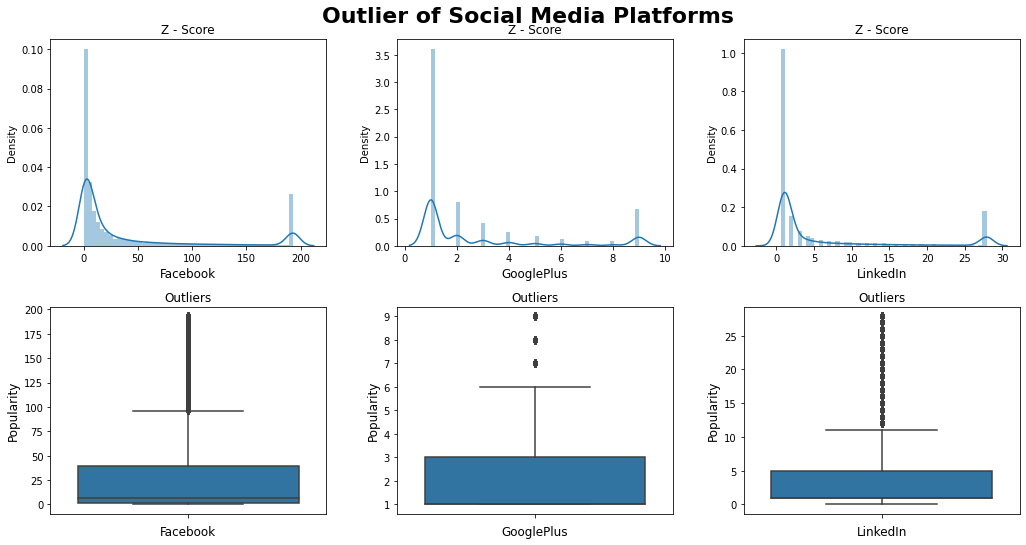

In [35]:
show_outliers(master_df, True)

In [36]:
master_df.reset_index(inplace=True, drop=True)
master_df.head(2)

,IDLink,Title,Headline,Source,Topic,PublishDate,SentimentTitle,SentimentHeadline,Facebook,GooglePlus,LinkedIn,PublishTime,Weekday,Facebook_scaled,GooglePlus_scaled,LinkedIn_scaled
0,80690.0,"monday, 29 feb 2016","ramallah, february 25, 2016 (wafa) - palestine...",nan,palestine,2016-02-28,0.0,-0.005906,1.0,1.0,1.0,14:03:00,Sunday,-0.633693,-0.617706,-0.549556
1,81052.0,"monday, 29 feb 2016","ramallah, february 29, 2016 (wafa) - the gover...",nan,palestine,2016-03-01,0.0,0.048546,1.0,1.0,1.0,09:29:00,Tuesday,-0.633693,-0.617706,-0.549556


*Now our dependent features are scaled..!*

# **Exploratory Data Analysis**
---

## **Categorizing SentimentTitle and SentimentHeadline**
---
We have categoried the sentiment title and sentiment headline into three different categories based on their sentiment scores:
- Positive
- Negative
- Neutral

In [37]:
master_df['SentimentTitle_Category'] = master_df['SentimentTitle'].apply(lambda x: 'neutral' if x == 0 else 'positive' if x > 0 else 'negative')

master_df['SentimentHeadline_Category'] = master_df['SentimentHeadline'].apply(lambda x: 'neutral' if x == 0 else 'positive' if x > 0 else 'negative')
master_df.head()

,IDLink,Title,Headline,Source,Topic,PublishDate,SentimentTitle,SentimentHeadline,Facebook,GooglePlus,LinkedIn,PublishTime,Weekday,Facebook_scaled,GooglePlus_scaled,LinkedIn_scaled,SentimentTitle_Category,SentimentHeadline_Category
0,80690.0,"monday, 29 feb 2016","ramallah, february 25, 2016 (wafa) - palestine...",nan,palestine,2016-02-28,0.000000,-0.005906,1.0,1.0,1.0,14:03:00,Sunday,-0.633693,-0.617706,-0.549556,neutral,negative
1,81052.0,"monday, 29 feb 2016","ramallah, february 29, 2016 (wafa) - the gover...",nan,palestine,2016-03-01,0.000000,0.048546,1.0,1.0,1.0,09:29:00,Tuesday,-0.633693,-0.617706,-0.549556,neutral,positive
2,80994.0,"tuesday, 1 mar 2016","ramallah, february 29, 2016 (wafa) - the gover...",nan,palestine,2016-03-01,-0.243068,0.048546,1.0,1.0,1.0,00:15:00,Tuesday,-0.633693,-0.617706,-0.549556,negative,positive
3,311.0,microsoft offering £100 discount on original b...,just ahead of the market rollout of microsoft'...,international business times via yahoo uk & ir...,microsoft,2015-11-08,0.000000,-0.132812,1.0,1.0,1.0,05:25:00,Sunday,-0.633693,-0.617706,-0.549556,neutral,negative
4,252.0,economy to improve though no change in last 6 ...,"&quot;in the coming six months, there seems to...",ians india private limited/yahoo india news vi...,economy,2015-11-08,-0.082022,0.205537,1.0,1.0,1.0,05:40:00,Sunday,-0.633693,-0.617706,-0.549556,negative,positive


In [38]:
def show_no_of_news_sentiment_title(df):
    print('******** No. of News items of SentimentTitle ********')
    print(df.SentimentTitle_Category.value_counts(),'\n')

    plt.figure(figsize=(10,8))
    df.SentimentTitle_Category.value_counts().plot(kind='bar')
    plt.title('News Items Distribution of Each Sentiment Title', fontdict={'size':20, 'fontweight' : 'bold'})
    plt.xlabel('Sentiment Type',fontdict={'size':15})
    plt.ylabel('No. of News Items',fontdict={'size':15})

def show_no_of_news_sentiment_headline(df):
    print('******** No. of News items of SentimentHeadline ********')
    print(df.SentimentHeadline_Category.value_counts(),'\n')

    plt.figure(figsize=(10,8))
    df.SentimentHeadline_Category.value_counts().plot(kind='bar')
    plt.title('News Items Distribution of Each Sentiment Headline', fontdict={'size':20, 'fontweight' : 'bold'})
    plt.xlabel('Sentiment Type',fontdict={'size':15})
    plt.ylabel('No. of News Items',fontdict={'size':15})


## **Sentiment Headline and Sentiment Title**
---
- Below two graphs depicts the count of news items falling in each sentiment category.
- We can clearly see that the neutral news items are less as compared to positive and negative news.
- We can also conclude that the number of negative sentiment news are higher as compared to positive ones.


******** No. of News items of SentimentTitle ********
negative    35492
positive    34382
neutral     17618
Name: SentimentTitle_Category, dtype: int64 



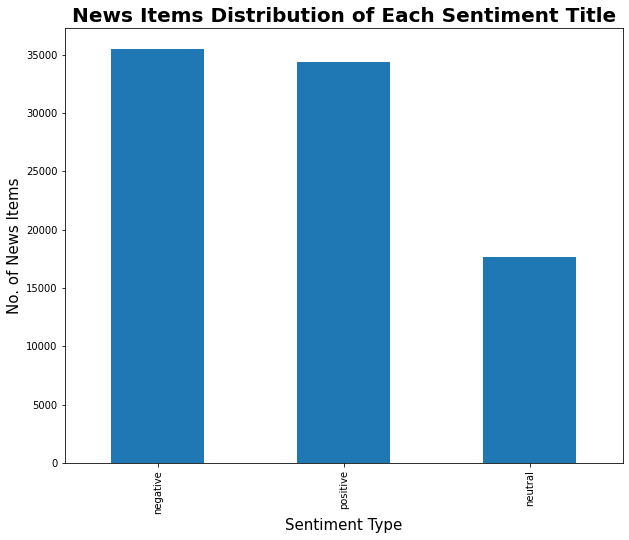

In [39]:
show_no_of_news_sentiment_title(master_df)

******** No. of News items of SentimentHeadline ********
negative    49452
positive    35328
neutral      2712
Name: SentimentHeadline_Category, dtype: int64 



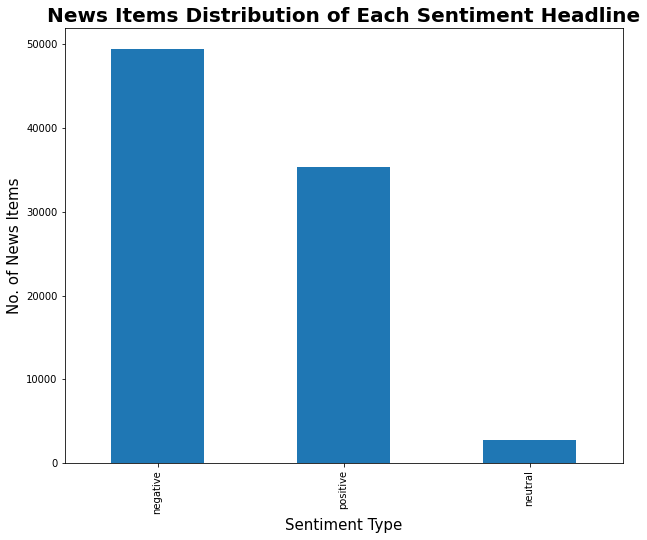

In [40]:
show_no_of_news_sentiment_headline(master_df)

## **Categorizing Sources**
---
As we can see that we have a lot of news outlets, but it's strenuous to work with such huge amount of varied data. So, we categoried the news outlets primarily into four main categories based on their number of news items published:
- Source A
- Source B
- Source C
- Source D

In [41]:
q1 = np.percentile(master_df['Source'].value_counts().unique(), 25, interpolation = 'midpoint')
q2 = np.percentile(master_df['Source'].value_counts().unique(), 50, interpolation = 'midpoint')
q3 = np.percentile(master_df['Source'].value_counts().unique(), 75, interpolation = 'midpoint')
print('----- Quaters -----')
print('> q1: ',q1,'\n> q2:',q2,'\n> q3:',q3)


source_df = pd.DataFrame(master_df['Source'].value_counts())
master_df['Source_type'] = master_df['Source'].apply(lambda x: 'A' if source_df['Source'][x]<=q1 else 'B' 
                                                     if source_df['Source'][x]<=q2 else 'C' if source_df['Source'][x]<=q3 else 'D')
master_df.drop(columns=['Source'], inplace = True)

----- Quaters -----
> q1:  57.5 
> q2: 124.5 
> q3: 254.0


## **News Items Distribution**
---
- Below plot clearly shows the distribution of news items published by each category of sources.
- Source A has published the highest, and Source B published the lowest number of news items respectively.

******** No. of News items in Sources ********
A    31868
D    28975
C    14395
B    12254
Name: Source_type, dtype: int64 



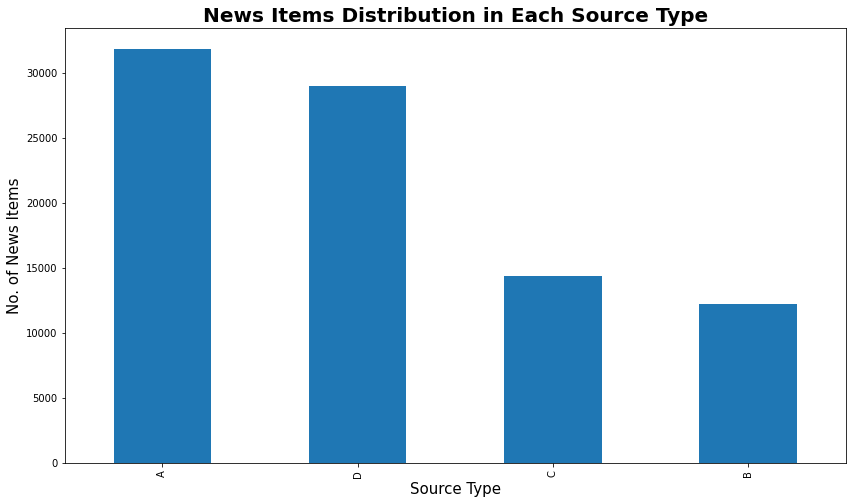

In [42]:
def show_news_distribution_in_sources(df):
    print('******** No. of News items in Sources ********')
    print(df.Source_type.value_counts(),'\n')

    plt.figure(figsize=(14,8))
    df.Source_type.value_counts().plot(kind='bar')
    plt.title('News Items Distribution in Each Source Type', fontdict={'size':20,'fontweight' : 'bold'})
    plt.xlabel('Source Type',fontdict={'size':15})
    plt.ylabel('No. of News Items',fontdict={'size':15})

show_news_distribution_in_sources(master_df)

## **Popularity Comparison for Social Media Platforms**
---
- Below plot represents the popularity level of a particular news topic on different social media platform.

In [43]:
master_df.head()

,IDLink,Title,Headline,Topic,PublishDate,SentimentTitle,SentimentHeadline,Facebook,GooglePlus,LinkedIn,PublishTime,Weekday,Facebook_scaled,GooglePlus_scaled,LinkedIn_scaled,SentimentTitle_Category,SentimentHeadline_Category,Source_type
0,80690.0,"monday, 29 feb 2016","ramallah, february 25, 2016 (wafa) - palestine...",palestine,2016-02-28,0.000000,-0.005906,1.0,1.0,1.0,14:03:00,Sunday,-0.633693,-0.617706,-0.549556,neutral,negative,C
1,81052.0,"monday, 29 feb 2016","ramallah, february 29, 2016 (wafa) - the gover...",palestine,2016-03-01,0.000000,0.048546,1.0,1.0,1.0,09:29:00,Tuesday,-0.633693,-0.617706,-0.549556,neutral,positive,C
2,80994.0,"tuesday, 1 mar 2016","ramallah, february 29, 2016 (wafa) - the gover...",palestine,2016-03-01,-0.243068,0.048546,1.0,1.0,1.0,00:15:00,Tuesday,-0.633693,-0.617706,-0.549556,negative,positive,C
3,311.0,microsoft offering £100 discount on original b...,just ahead of the market rollout of microsoft'...,microsoft,2015-11-08,0.000000,-0.132812,1.0,1.0,1.0,05:25:00,Sunday,-0.633693,-0.617706,-0.549556,neutral,negative,C
4,252.0,economy to improve though no change in last 6 ...,"&quot;in the coming six months, there seems to...",economy,2015-11-08,-0.082022,0.205537,1.0,1.0,1.0,05:40:00,Sunday,-0.633693,-0.617706,-0.549556,negative,positive,A


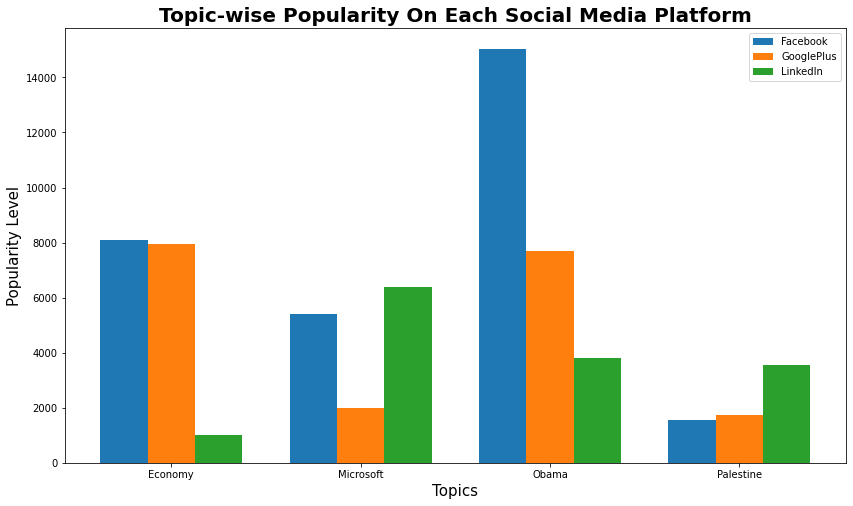

In [44]:
def show_popularities(df):
    facebook = abs(df.groupby(['Topic'])['Facebook_scaled'].sum())
    googleplus = abs(df.groupby(['Topic'])['GooglePlus_scaled'].sum())
    linkedin = abs(df.groupby(['Topic'])['LinkedIn_scaled'].sum())

    ind = np.arange(len(topics)) 


    plt.figure(figsize=(14,8))
    plt.bar(ind-0.25,facebook,width=0.25,label='Facebook')
    plt.bar(ind,googleplus,width=0.25,label='GooglePlus')
    plt.bar(ind+0.25,linkedin,width=0.25,label='LinkedIn')

    plt.xticks(ind, topics)
    plt.legend()
    plt.title('Topic-wise Popularity On Each Social Media Platform', fontdict={'size':20, 'fontweight' : 'bold'})
    plt.xlabel('Topics', fontdict={'size':15})
    plt.ylabel('Popularity Level', fontdict={'size':15})
    plt.show()

show_popularities(master_df)

From the above observations we can conclude on few points:
-   News item related to Obama are much more popular on Facebook as compared to other platforms.
-   Popularity level of Economy related news items and Obama related news items is approximately equal on GooglePlus.
-   Popularity level of Economy news is same on both Facebook and GooglePlus.
-   On LinkedIn, Microsoft related news gains higher popularity compared to others.
-  On LinkedIn, popularity of Economy news items is very less.

